In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy import stats
import numpy as np

In [3]:
data = pd.read_csv('../data/control_data.csv')
data = data.drop(['Unnamed: 0', 'result', 'table'], axis=1)
data

,_start,_stop,_time,_value,_field,_measurement,zählername
0,2023-08-30T23:00:00Z,2023-09-30T00:00:00Z,2023-09-01T00:15:00Z,6759.777681,counter,stromzaehler,Hausanschluss
1,2023-08-30T23:00:00Z,2023-09-30T00:00:00Z,2023-09-01T00:30:00Z,6760.022801,counter,stromzaehler,Hausanschluss
2,2023-08-30T23:00:00Z,2023-09-30T00:00:00Z,2023-09-01T00:45:00Z,6760.267920,counter,stromzaehler,Hausanschluss
3,2023-08-30T23:00:00Z,2023-09-30T00:00:00Z,2023-09-01T01:00:00Z,6760.513040,counter,stromzaehler,Hausanschluss
4,2023-08-30T23:00:00Z,2023-09-30T00:00:00Z,2023-09-01T01:15:00Z,6760.668233,counter,stromzaehler,Hausanschluss
...,...,...,...,...,...,...,...
2779,2023-08-30T23:00:00Z,2023-09-30T00:00:00Z,2023-09-29T23:00:00Z,7586.355933,counter,stromzaehler,Hausanschluss
2780,2023-08-30T23:00:00Z,2023-09-30T00:00:00Z,2023-09-29T23:15:00Z,7586.620133,counter,stromzaehler,Hausanschluss
2781,2023-08-30T23:00:00Z,2023-09-30T00:00:00Z,2023-09-29T23:30:00Z,7586.868167,counter,stromzaehler,Hausanschluss
2782,2023-08-30T23:00:00Z,2023-09-30T00:00:00Z,2023-09-29T23:45:00Z,7587.108000,counter,stromzaehler,Hausanschluss


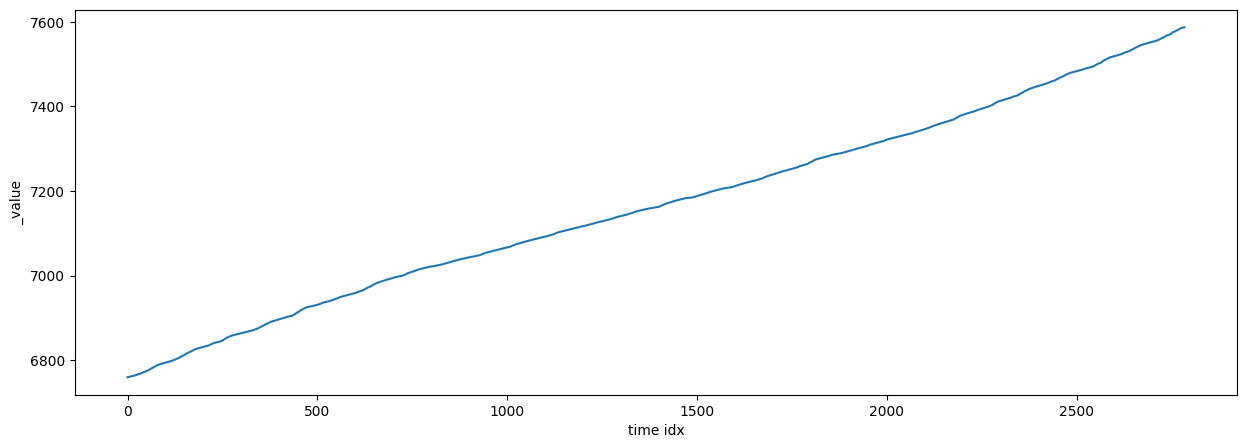

In [4]:
target = data['_value']
features = data['_time']

plt.figure(figsize=(15,5))
plt.plot(target)
plt.xlabel('time idx')
plt.ylabel('_value')
plt.show()

In [19]:
# split data and put on top
jump_idx = target[target == 0]
part_1 = target[:14959]
part_2 = target[14959:]

diff = target[14958]
part_2 += diff

target = pd.concat([part_1, part_2], axis=0)
target.shape

(34023,)

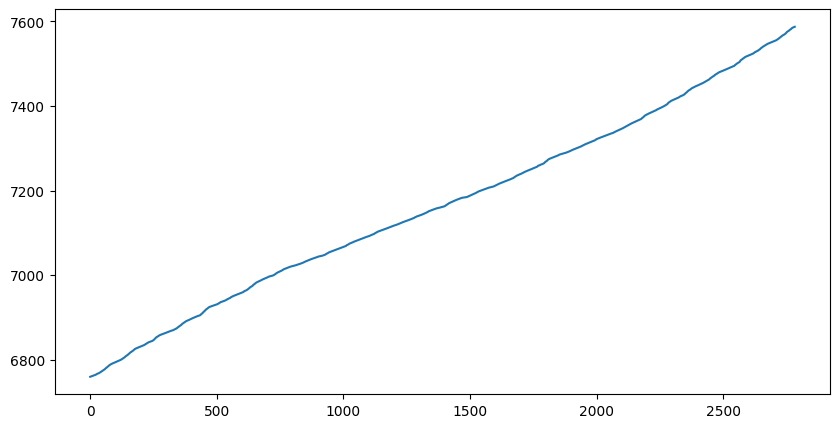

In [5]:
plt.figure(figsize=(10,5))
plt.plot(target)
plt.show()

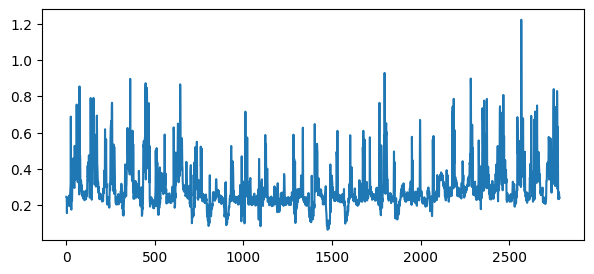

In [6]:
diff = target.diff()
diff = diff.drop([0], axis=0)
features = features.drop([0], axis=0)
plt.figure(figsize=(7,3))
plt.plot(diff)
plt.show()

In [7]:
# standardize data
diff = diff.to_frame()
features = features.to_frame()
diff_ = diff[(np.abs(stats.zscore(diff)) < 3).all(axis=1)]
features = features[(np.abs(stats.zscore(diff)) < 3).all(axis=1)]

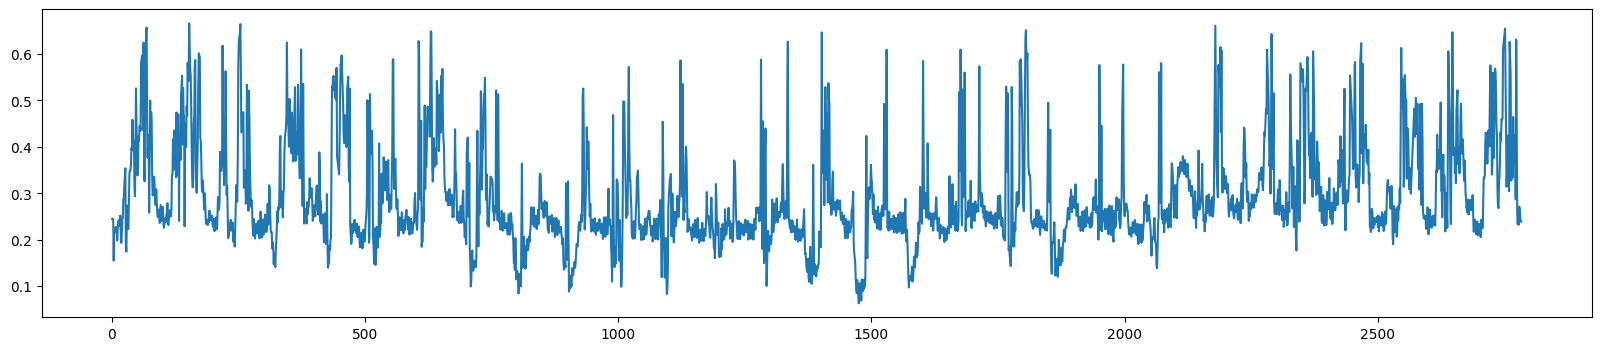

In [8]:
plt.figure(figsize=(20,4))
plt.plot(diff_)
plt.show()

In [9]:
diff_.iloc[:, 0]

1       0.245120
2       0.245120
3       0.245120
4       0.155193
5       0.218667
          ...   
2779    0.271400
2780    0.264200
2781    0.248033
2782    0.239833
2783    0.238978
Name: _value, Length: 2727, dtype: float64

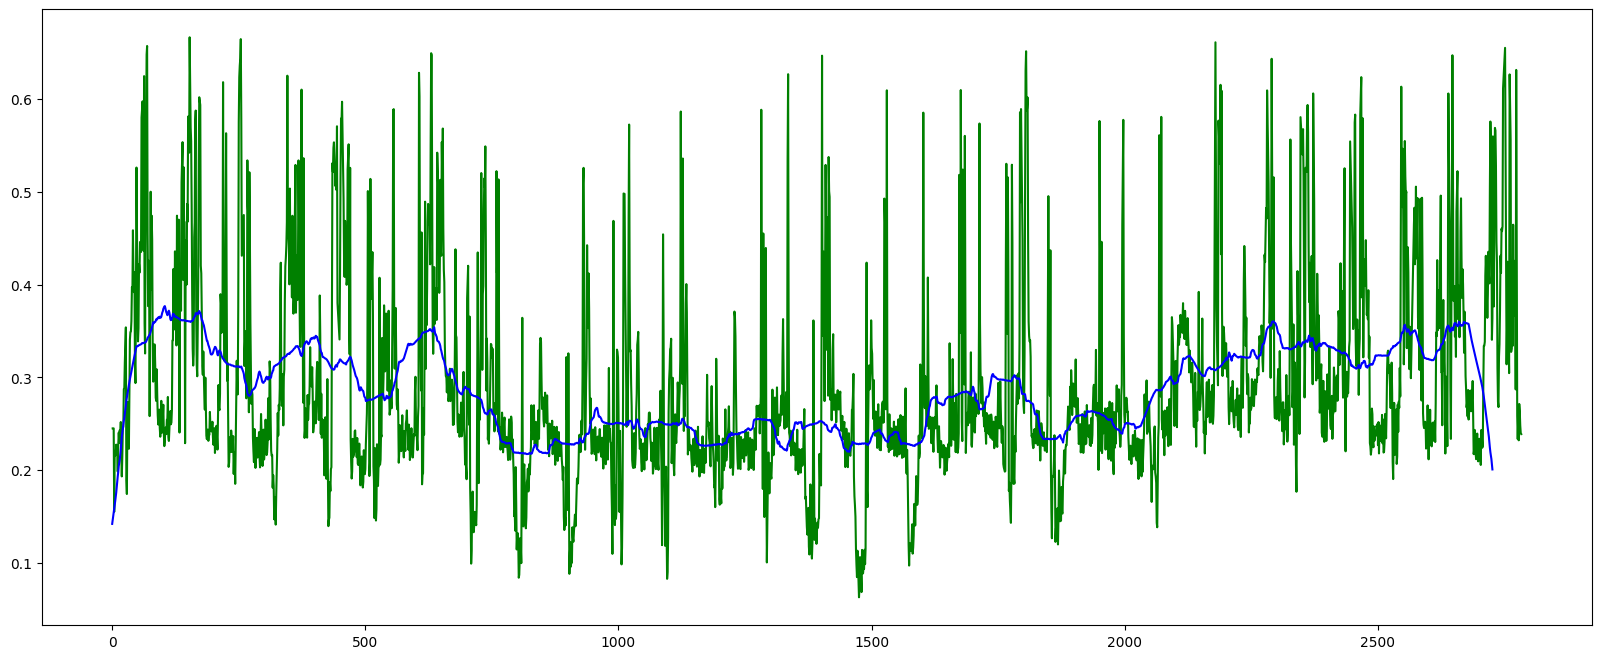

In [10]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), "same") / w

plt.figure(figsize=(20,8))
plt.plot(diff_, color='green')
plt.plot(moving_average(diff_.iloc[:, 0],96), color='blue')
plt.show()

In [11]:
# put into one dataframe
df = pd.concat([features, diff_], axis=1)
df.set_index('_time', inplace=True)


In [12]:
df.to_csv('../data/test_data_new.csv')

In [27]:
# train test split
train_idx_end = int(0.8*len(df))

train = df.iloc[:train_idx_end]
test = df.iloc[train_idx_end:]

train.to_csv('../data/train.csv')
test.to_csv('../data/test.csv')